In [54]:
#Import Data , Pandas Library, and Seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ArrestData=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NYPD_Arrests_Data__Historic.csv")
ArrestData.head()



,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,205590989,11/24/2019,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,28,0.0,25-44,F,WHITE,997571.0,234556.0,40.810476,-73.951880,POINT (-73.95188015099995 40.81047604300005)
1,202546976,09/17/2019,793.0,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,F,M,6,0.0,45-64,M,BLACK,982746.0,206647.0,40.733883,-74.005428,POINT (-74.00542831099995 40.73388303300004)
2,203563701,10/10/2019,494.0,"STOLEN PROPERTY 2,1,POSSESSION",111.0,POSSESSION OF STOLEN PROPERTY,PL 1654502,F,K,90,0.0,18-24,M,BLACK HISPANIC,1000830.0,197889.0,40.709829,-73.940198,POINT (-73.94019763899996 40.70982902900005)
3,205169609,11/14/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,B,43,0.0,18-24,M,BLACK HISPANIC,1020183.0,239283.0,40.823387,-73.870170,POINT (-73.87017044999999 40.823387291000074)
4,204097687,10/23/2019,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211300,F,Q,114,0.0,25-44,M,BLACK,1007694.0,219657.0,40.769561,-73.915363,POINT (-73.91536344699995 40.769561242000066)


Data review for cleansing

In [55]:
#View data types and descriptions
ArrestData.count()
#Data looks very complete

,0
ARREST_KEY,5725522
ARREST_DATE,5725522
PD_CD,5724646
PD_DESC,5716353
KY_CD,5715766
OFNS_DESC,5716353
LAW_CODE,5725326
LAW_CAT_CD,5701922
ARREST_BORO,5725514
ARREST_PRECINCT,5725522


In [56]:
#Check data formats
ArrestData.dtypes

,0
ARREST_KEY,int64
ARREST_DATE,object
PD_CD,float64
PD_DESC,object
KY_CD,float64
OFNS_DESC,object
LAW_CODE,object
LAW_CAT_CD,object
ARREST_BORO,object
ARREST_PRECINCT,int64


Data Cleansing:
Update data types and create new field

Create new data set with only columns needed

Filter Data Set for 2 precincts that will be compared and to remove any data values we don't need

Rename columns

In [57]:
#Change data types and create year column from Arrest Date for filtering and analysis
ArrestData['ARREST_DATE'] = pd.to_datetime(ArrestData['ARREST_DATE'])
ArrestData['ARREST_YEAR'] = ArrestData['ARREST_DATE'].dt.year
ArrestData

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,ARREST_YEAR
0,205590989,2019-11-24,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,28,0.0,25-44,F,WHITE,997571.0,234556.0,40.810476,-73.951880,POINT (-73.95188015099995 40.81047604300005),2019
1,202546976,2019-09-17,793.0,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,F,M,6,0.0,45-64,M,BLACK,982746.0,206647.0,40.733883,-74.005428,POINT (-74.00542831099995 40.73388303300004),2019
2,203563701,2019-10-10,494.0,"STOLEN PROPERTY 2,1,POSSESSION",111.0,POSSESSION OF STOLEN PROPERTY,PL 1654502,F,K,90,0.0,18-24,M,BLACK HISPANIC,1000830.0,197889.0,40.709829,-73.940198,POINT (-73.94019763899996 40.70982902900005),2019
3,205169609,2019-11-14,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,B,43,0.0,18-24,M,BLACK HISPANIC,1020183.0,239283.0,40.823387,-73.870170,POINT (-73.87017044999999 40.823387291000074),2019
4,204097687,2019-10-23,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211300,F,Q,114,0.0,25-44,M,BLACK,1007694.0,219657.0,40.769561,-73.915363,POINT (-73.91536344699995 40.769561242000066),2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725517,201765665,2019-08-30,905.0,"INTOXICATED DRIVING,ALCOHOL",347.0,INTOXICATED & IMPAIRED DRIVING,VTL11920U2,M,M,14,0.0,18-24,F,BLACK,987377.0,211980.0,40.748520,-73.988716,POINT (-73.98871585799998 40.74852036900006),2019
5725518,205225898,2019-11-16,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,K,70,0.0,18-24,F,WHITE HISPANIC,995346.0,174216.0,40.644861,-73.960017,POINT (-73.96001731099994 40.644860566000034),2019
5725519,200468223,2019-07-31,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,LOC000000V,V,K,60,1.0,45-64,M,BLACK,989472.0,148971.0,40.575574,-73.981204,POINT (-73.98120362499998 40.575573630000065),2019
5725520,205012373,2019-11-11,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,19,0.0,<18,M,WHITE HISPANIC,993570.0,216847.0,40.761875,-73.966358,POINT (-73.96635808399998 40.76187469000007),2019


In [58]:
#Check min and max years
print(ArrestData['ARREST_YEAR'].min())
print(ArrestData['ARREST_YEAR'].max())

2006
2023


In [59]:
#Get column name list to assist with selecting only columns to be kept
column_list_values = ArrestData.columns
print(column_list_values)

#Filter data to only show arrest data from 2022 and 2023
ArrestDataFiltered = ArrestData.loc[ArrestData['ARREST_YEAR'] >= 2022]

#Create new df with only columns to analyze
ArrestData2 = ArrestDataFiltered[['ARREST_KEY','ARREST_YEAR', 'AGE_GROUP', 'PERP_SEX', 'ARREST_PRECINCT', 'PERP_RACE']]

#Rename Columns
ArrestData2 = ArrestData2.rename(columns={'ARREST_KEY': 'Arrest ID', 'ARREST_YEAR':'Arrest Year', 'AGE_GROUP': "Age Range", 'PERP_SEX': "Sex", 'ARREST_PRECINCT': 'Precinct', 'PERP_RACE':'Race'})

ArrestData2

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat', 'ARREST_YEAR'],
      dtype='object')


,Arrest ID,Arrest Year,Age Range,Sex,Precinct,Race
4867725,238815792,2022,18-24,M,63,BLACK
4871038,238911482,2022,18-24,F,1,WHITE HISPANIC
4872516,240867735,2022,45-64,M,49,BLACK
4873350,243912354,2022,25-44,F,6,BLACK
4873906,245055853,2022,25-44,M,34,WHITE HISPANIC
...,...,...,...,...,...,...
5484035,279453516,2023,<18,M,67,BLACK
5484036,277390414,2023,45-64,M,108,BLACK
5484037,277877104,2023,18-24,M,94,WHITE
5484038,276061290,2023,25-44,M,46,WHITE HISPANIC


Data Analysis:

'Arrests by Age Range' and 'Arrests by Race and Sex'

In [60]:
# selected 2 random prectincts using ArrestData2.sample(), this resulted in Precincts 104 and 63
#Create df set filtered for just the 2 precincts being evaluated
ArrestData3 = ArrestData2.loc[((ArrestData2['Precinct'] == 104) | (ArrestData2['Precinct'] == 63)) & (ArrestData2['Sex']!= 'U')]

#Arrests by age
ArrestAge = ArrestData3.groupby(['Age Range','Precinct'])['Arrest ID'].nunique()

ArrestAge



Age Range  Precinct
18-24      63           902
           104          660
25-44      63          2341
           104         2343
45-64      63           703
           104          675
65+        63            55
           104           68
<18        63           149
           104          173
Name: Arrest ID, dtype: int64

In [61]:
#Arrests by Race and Gender

ArrestRG = pd.pivot_table(ArrestData3, values='Arrest ID', index=['Precinct', 'Sex'],
                       columns=['Race'], aggfunc="nunique", margins=True, margins_name='Total')
ArrestRG

Race          AMERICAN INDIAN/ALASKAN NATIVE  ASIAN / PACIFIC ISLANDER  BLACK  \
Precinct Sex                                                                    
63       F                                 8                        41    551   
         M                                 8                       112   2345   
104      F                                 1                        27     97   
         M                                13                       113    503   
Total                                     30                       293   3496   

Race          BLACK HISPANIC  UNKNOWN  WHITE  WHITE HISPANIC  Total  
Precinct Sex                                                         
63       F                23        3    129              90    845  
         M                70       22    434             314   3305  
104      F                35        4    152             343    659  
         M               317       11    711            1592   3260  
Total                    445       40   1426            2339   8069

Data Visualizations

<Axes: xlabel='Age Range', ylabel='Arrest ID'>

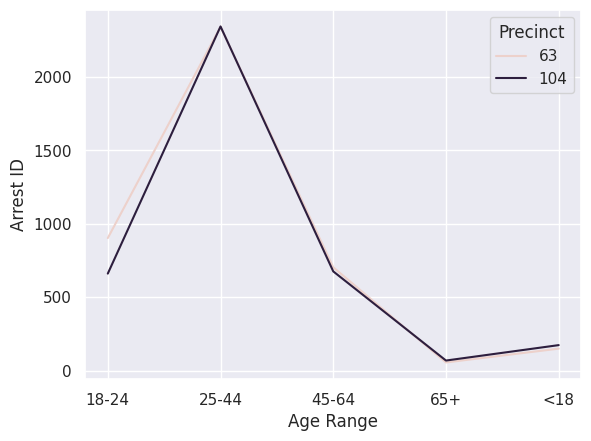

In [63]:
#Line chart of arrests by age range with precincts as the color
#convert series to data frame
ArrestAge = ArrestAge.reset_index()
sns.lineplot(data=ArrestAge, x = "Age Range", y='Arrest ID', hue = 'Precinct')


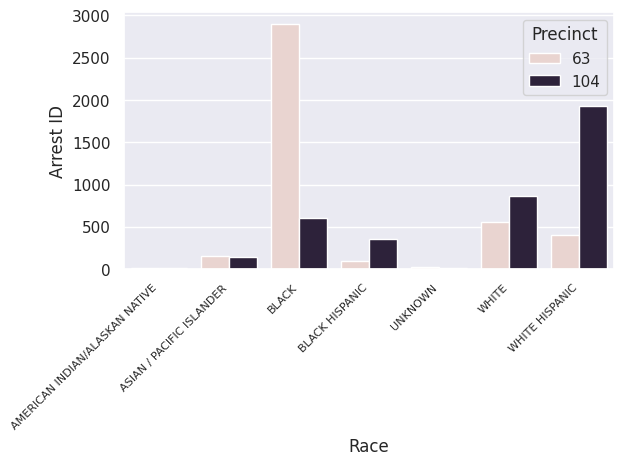

In [64]:
#Bar chart of arrests by race
ArrestRGChart = ArrestData3.groupby(['Race','Precinct'])['Arrest ID'].nunique()
ArrestRGChart=ArrestRGChart.reset_index()
sns.set(font_scale=1)

ArRGChart=sns.barplot(data=ArrestRGChart, x = 'Race', y='Arrest ID', hue = 'Precinct')
#resize x axis labels

for tick in ArRGChart.get_xticklabels():
    tick.set_fontsize(8)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()


While the arrests by age range don't vary significantly by precinct, the arrests by race do. The data itself can carry an inherent bias since it's a specific population and we do not know what the distirbuiton of race is for the whole population in the precinct areas.

Working with arrest data carries its own set of risk associated with bias. There could be systemic bias inherent to law enforcement, bias due to the political climate at the time of the arrests, the socioeconmic make up of the population as a whole, and potential for personal bias in arresting officers.

